# Overfitting
Example showing issues with overfitting written in python using SciKit Learn (sklearn) using manufactured data.

Import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

Define constants used:

In [2]:
FILENAME = 'data/company_data2.csv'
PLOT1 = 'raw_dat2.png'
PLOT2 = 'best_fit2.png'
DEGREE = 6

Read file and display first five records:

In [3]:
df = pd.read_csv(FILENAME)
df.head()

,BestEstimateEmployees,BestEstimateTurnover,Latitude,Longitude
0,1,190000,50.55,-4.44
1,3,240000,50.86,-4.21
2,5,400000,51.13,-0.18
3,8,615000,51.34,-0.74
4,11,95000,50.94,-1.47


Edit file to delete features not needed later:

In [4]:
del df['Latitude']
del df['Longitude']
df.head()

,BestEstimateEmployees,BestEstimateTurnover
0,1,190000
1,3,240000
2,5,400000
3,8,615000
4,11,95000


Cast data as a Numpy array and plot data before processing:  

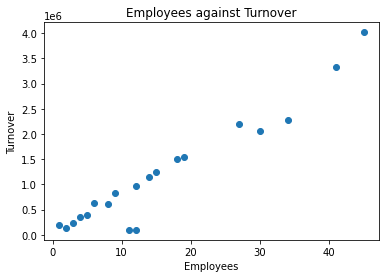

In [5]:
fig, ax = plt.subplots()
#need to cast data as a numpy array for later.  
#the plot works without doing this because the data is automatically converted to a 
#numpy array in matplotlib
x = np.array(df.drop('BestEstimateTurnover',axis=1))   
y = np.array(df['BestEstimateTurnover'])
ax.set_xlabel('Employees')
ax.set_ylabel('Turnover')
ax.set_title('Employees against Turnover')
ax.scatter(x, y)
fig.savefig(PLOT1)

Use standard SKLEARN functionality to split the data into a test and training data set:

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, shuffle = False)

Create a linear regression model and train the model using the training sets:

In [7]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

Create a polynomial regression model and train the model using the training sets:

In [8]:
poly = PolynomialFeatures(degree=DEGREE, include_bias=False)
poly_features = poly.fit_transform(x_train.reshape(-1, 1))
poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(poly_features, y_train)

LinearRegression()

Make predictions using the testing set and assess accuracy of predictions:

In [9]:
y_pred = regr.predict(x_test)
print('For the straight line')

# The gradient and intercept of the slope.  Gradient is first item in coefficent list.
gradient = regr.coef_[0]
print(f'The offset is {regr.intercept_:,.0f} and the gradient of the slope is {gradient:,.0f}')

# The coefficient of determination
print(f'he coefficient of determination, a measure of the fit is: {r2_score(y_test, y_pred):.2f}')
print('1 is a perfect prediction')

For the straight line
The offset is -175,110 and the gradient of the slope is 79,697
he coefficient of determination, a measure of the fit is: 0.93
1 is a perfect prediction


In [10]:
y_poly_pred = poly_reg_model.predict(poly_features)

# The coefficient of determination
print(f'The coefficient of determination, a measure of the fit is: {r2_score(y_test, y_poly_pred):.2f}')
print('1 is a perfect prediction')

The coefficient of determination, a measure of the fit is: 0.79
1 is a perfect prediction


Plot the calculated regression line against the test data: 

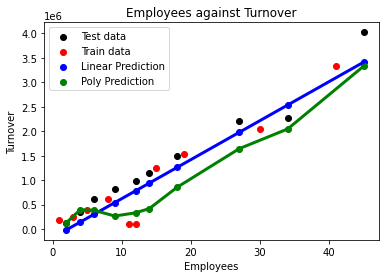

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('Employees')
ax.set_ylabel('Turnover')
ax.set_title('Employees against Turnover')
ax.scatter(x_test, y_test, color="black")
ax.scatter(x_train, y_train, color="red")
ax.scatter(x_test, y_pred, color="blue")
ax.scatter(x_test, y_poly_pred, color="green")
ax.legend(['Test data', 'Train data', 'Linear Prediction', 'Poly Prediction'])
ax.plot(x_test, y_pred, color="blue", linewidth=3)
ax.plot(x_test, y_poly_pred, color="green", linewidth=3)
fig.savefig(PLOT2)